In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\123\Downloads\mysql\price-history-1397-09-01-to-1399-09-01.foolad.xlsx", header=7, parse_dates=True)


In [2]:
df = df[['پایانی','تاریخ میلادی']]
df

,پایانی,تاریخ میلادی
0,13970,2020-11-21
1,14210,2020-11-18
2,13560,2020-11-17
3,12970,2020-11-16
4,12660,2020-11-15
...,...,...
475,4875,2018-12-01
476,5045,2018-11-28
477,5241,2018-11-27
478,5195,2018-11-26


In [3]:
df.set_index('تاریخ میلادی', inplace=True, drop=True)

In [4]:
df.sort_index(ascending=True, inplace=True)
df

,پایانی
تاریخ میلادی,
2018-11-24,5254
2018-11-26,5195
2018-11-27,5241
2018-11-28,5045
2018-12-01,4875
...,...
2020-11-15,12660
2020-11-16,12970
2020-11-17,13560


In [5]:
dg = df['2019-05-01':'2019-05-30']

In [6]:
dg.reset_index(inplace=True)
dg

,تاریخ میلادی,پایانی
0,2019-05-01,4391
1,2019-05-04,4487
2,2019-05-05,4499
3,2019-05-06,4295
4,2019-05-07,4216
5,2019-05-08,4336
6,2019-05-11,4212
7,2019-05-12,4126
8,2019-05-13,4233
9,2019-05-14,4292


In [7]:
l = {}
for i in range(len(dg.index)):
    if i<len(dg.index):
        for j in range(i+1, len(dg.index)):
            l[(i,j)]=(dg.iloc[j,1]-dg.iloc[i,1])
            
    

In [8]:
inj=[]
for i in dg.index:
    if i%2!=0:
        inj.append(i)
mt = len(inj) # The utmost number of consecutive trades

def get_key(n):
    h = set()
    for i in l.keys():
        h.add(i[n])
    return list(h)

In [9]:
vh=[]
for i in l.keys():
    vh.append([i])
def fgh(i):
    if i==1:
        return vh
    if i>1:
        wh=[]
        for t in fgh(i-1):
            for j in l.keys():
                if (t[-1][1]<j[0]):
                    wh.append([t[i] for i in range(i-1)]+[j])

    return wh

In [10]:
#fgh(10)

In [11]:
fih={}
for i in range(1,mt+1):
    cf=[]
    for j in fgh(i):
        bg=0
        for s in j:
            bg+=l[s]
        cf.append((j,bg))
    fih[i]=cf
    

In [12]:
#fih[4]

In [13]:
#l

In [14]:
kih={}
for i in range(1,mt+1):
    lst=[]
    for j in fih[i]:
        lst.append(j[1])
    for j in fih[i]:
        if j[1]==max(lst):
            kih[i]=[j[0],max(lst)]
    

In [15]:
kih

{1: [[(7, 19)], 374],
 2: [[(7, 9), (12, 19)], 504],
 3: [[(4, 5), (7, 9), (12, 19)], 624],
 4: [[(0, 2), (4, 5), (7, 9), (12, 19)], 732],
 5: [[(0, 2), (4, 5), (7, 9), (12, 14), (16, 19)], 776],
 6: [[(0, 2), (4, 5), (7, 9), (11, 12), (13, 14), (16, 19)], 726],
 7: [[(0, 2), (4, 5), (7, 9), (11, 12), (13, 14), (15, 16), (17, 19)], 667],
 8: [[(0, 2), (4, 5), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 19)],
  561],
 9: [[(0, 1),
   (2, 3),
   (4, 5),
   (7, 8),
   (9, 10),
   (11, 12),
   (13, 14),
   (15, 16),
   (17, 19)],
  345],
 10: [[(0, 1),
   (2, 3),
   (4, 5),
   (6, 7),
   (8, 9),
   (10, 11),
   (12, 13),
   (14, 15),
   (16, 17),
   (18, 19)],
  -32]}

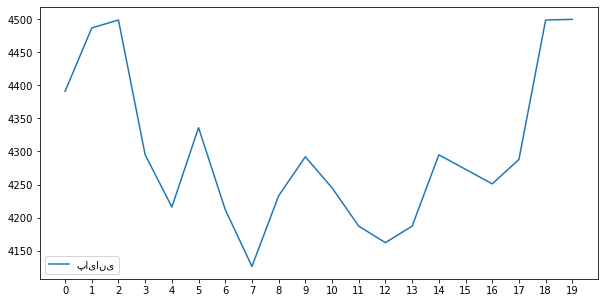

In [16]:
dg.plot(figsize=(10,5),xticks=dg.index)